In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

2.2.0


In [2]:
# Google Drive 에 저장되어 있는 diabetes,csv 파일을 읽어들이기 위해서
# Colab 의 /content/gdrive/ 에 Google Drive 마운트 시킴

from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [3]:
# 마운트된 Google Drive 의 working directory 이동

import os

working_dir = 'tensorflow_2.x_working_dir'

# Google Drive 에서 Colab Default Directory
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()  # save current dir

try:

    os.chdir(colab_default_dir)

    if not os.path.exists(working_dir):
        os.mkdir(working_dir)

    os.chdir(working_dir)  # change working dir
    print('current dir = ', os.getcwd())

except Exception as err:
    
    os.chdir(original_dir)
    print(str(err))

current dir =  /content/gdrive/My Drive/Colab Notebooks/tensorflow_2.x_working_dir


In [4]:
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    x_data = loaded_data[ :, 0:-1]
    t_data = loaded_data[ :, [-1]]

    print("x_data.shape = ", x_data.shape)
    print("t_data.shape = ", t_data.shape)

except Exception as err:

    print(str(err))

x_data.shape =  (759, 8)
t_data.shape =  (759, 1)


In [0]:
# Logistic Regression 을 keras 이용하여 생성

model = Sequential()

model.add(Dense(t_data.shape[1], input_shape=(x_data.shape[1], ),activation='sigmoid'))  # 노드 1개인 출력층 생성

In [6]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [7]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs=500, validation_split=0.2, verbose=2)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)

Epoch 1/500
19/19 - 0s - loss: 0.6041 - accuracy: 0.6689 - val_loss: 0.6042 - val_accuracy: 0.6250
Epoch 2/500
19/19 - 0s - loss: 0.6028 - accuracy: 0.6705 - val_loss: 0.6030 - val_accuracy: 0.6250
Epoch 3/500
19/19 - 0s - loss: 0.6016 - accuracy: 0.6705 - val_loss: 0.6019 - val_accuracy: 0.6250
Epoch 4/500
19/19 - 0s - loss: 0.6003 - accuracy: 0.6705 - val_loss: 0.6008 - val_accuracy: 0.6250
Epoch 5/500
19/19 - 0s - loss: 0.5992 - accuracy: 0.6722 - val_loss: 0.5997 - val_accuracy: 0.6250
Epoch 6/500
19/19 - 0s - loss: 0.5980 - accuracy: 0.6738 - val_loss: 0.5986 - val_accuracy: 0.6250
Epoch 7/500
19/19 - 0s - loss: 0.5968 - accuracy: 0.6738 - val_loss: 0.5975 - val_accuracy: 0.6250
Epoch 8/500
19/19 - 0s - loss: 0.5956 - accuracy: 0.6738 - val_loss: 0.5965 - val_accuracy: 0.6250
Epoch 9/500
19/19 - 0s - loss: 0.5945 - accuracy: 0.6738 - val_loss: 0.5954 - val_accuracy: 0.6250
Epoch 10/500
19/19 - 0s - loss: 0.5934 - accuracy: 0.6738 - val_loss: 0.5944 - val_accuracy: 0.6250
Epoch 11/

In [8]:
model.evaluate(x_data, t_data)

24/24 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7655


[0.4825364351272583, 0.7654808759689331]

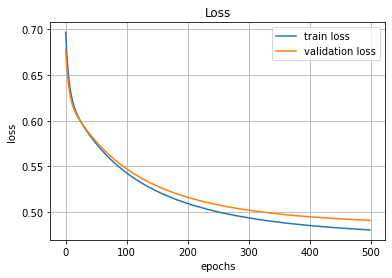

In [9]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

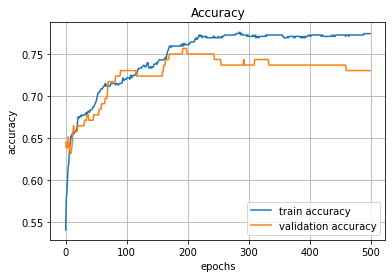

In [10]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()